In [2]:
#  абстракция: идеальная модель нашей генеральной совокупности 

In [91]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline

In [4]:
mu = 100
sigma = 10

In [5]:
population = np.round(np.random.normal(mu, sigma, 10000), 2) #нормальное распределение из параметров

In [6]:
population #пусть это будет нашей генеральной совокупностью

array([ 99.34,  97.54,  99.45, ..., 111.29,  95.96, 102.15])

C:\Users\Дима\AppData\Local\Temp\ipykernel_12100\4209463519.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(population, kde=False)


<Axes: >

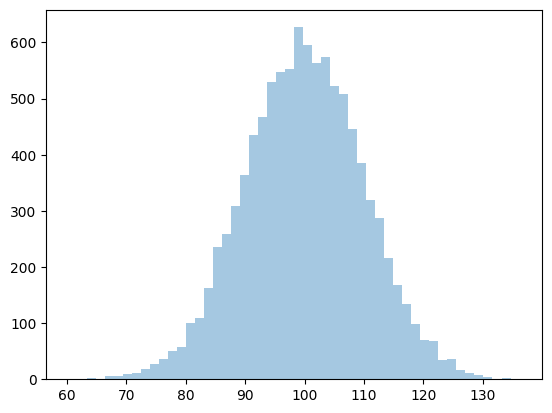

In [7]:
sns.distplot(population, kde=False)

In [45]:
mu = population.mean() #среднее в генеральной совокупности

In [46]:
sigma = population.std() #стандартное отклонение в генеральной совокупности

In [10]:
# пример того что ЦПТ действительно работает

In [11]:
sample_size = 30 # размер нашей выборки

In [12]:
sample = np.random.choice(population, sample_size, False) #наша выборки

In [13]:
sample.mean()

102.30133333333332

In [14]:
sample_means =[] #набор средних в выборках

In [15]:
n = 10000 #колличесвто выборок

In [16]:
for i in range(n):
    sample = np.random.choice(population, sample_size, False) #наша выборки
    sample_means.append(sample.mean())

C:\Users\Дима\AppData\Local\Temp\ipykernel_12100\1429077293.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means, kde=False) #график средних в выборках


<Axes: >

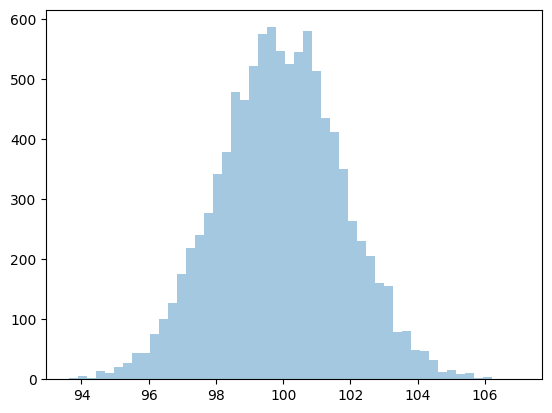

In [17]:
sns.distplot(sample_means, kde=False) #график средних в выборках

In [18]:
np.mean(sample_means) # центропредельная теорема,среднее средних

99.92625476666667

In [19]:
# Правило 3х сигм: 100% наших наблюдений лежит +- 3 сигмы

In [20]:
# Правило 1.96 сигм - 95% всех наблюдений лежит в этом диапазоне

In [21]:
# se = sigma / корень(n)

In [22]:
se = population.std() / sample_size**0.5

In [23]:
se # стандартная ошибка

1.8295382129048756

In [24]:
np.std(sample_means) #стандартная ошибка непосредственно в центропреельной теореме

1.8505405431130268

In [25]:
population.mean() + 1.96* se

103.51281989729355

In [26]:
population.mean() - 1.96* se

96.34103010270644

In [27]:
[96.27, 103.38] # 95% интервал

[96.27, 103.38]

In [28]:
#========================================

In [29]:
# переходим в реальность

In [30]:
sample_real = np.random.choice(population, sample_size, False) #наша выборки

In [31]:
sample_real # в реальность у нас 1 выборка

array([ 88.48, 103.11, 105.27, 118.16,  96.34,  95.75,  99.92,  97.33,
       105.34, 110.59,  95.69, 109.65, 113.04,  88.9 ,  88.83, 113.01,
       103.94, 110.6 ,  93.9 ,  84.44,  81.43, 106.66,  98.2 , 115.42,
        88.41,  93.8 ,  92.99,  94.8 , 105.27, 108.59])

In [32]:
sample_real.mean() #находим среднее

100.262

In [33]:
sample_real.std() #находим стандартное отклонение, ее можно использовать в фомуле, но там уже будет не нормальное распределение,
# а Т распределение

9.598700050874944

In [34]:
# se = sigma / корень(n) 

In [35]:
se = sample_real.std() / sample_size ** 0.5 #находим стандартную ошибку

In [36]:
se

1.7524748468633975

In [37]:
#находим оценненый 95% доверительный интервал

In [38]:
sample_real.mean() + 1.96*se

103.69685069985226

In [39]:
sample_real.mean() - 1.96*se

96.82714930014774

In [40]:
# при многократном повторении 95% из полученных интервалов  наше среднее лежит в генеральной 
# совокупности в интервале от 96 до 103.
# Если бы кто нибудь утверждал, что среднее в ГС 
# выходит за эти рамки(H0), то математически можно было бы
# отклонить его утверждение
# и наоборот, если бы утверждали что она лежит в этом интервале(H0), 
# то это утрверждение можно было бы принять!
# так формулируется две гипотезы: Н0 и Н1, при этом мы принимаем или отклоняем только Н0

In [41]:
# Важно:

# p-уровень значимости не говорит о силе эффекта 
# (напр., пользователи стали пользоваться приложением меньше в 3 или 1.1 раза)

# Если получили уровень значимости выше порога – это не значит, что нулевая гипотеза верна. 
# Просто такой уровень значимости не позволяет нам её отклонить.

In [42]:
# ===============================================

#### Z- распределение для средних в множетсвенной выборке 
Это идеальная математическая модель, к которому мы стремимся, потому что нам невозможно узнать среднее в генеральной совокупности и ее стандартное отклонение 

In [80]:
sample_size = 5 #объем нашей выборки

In [81]:
se = population.std() / sample_size**0.5  #стандартная ошибка среднего

In [82]:
z_scores = [] #накопитель значений среднего
n = 10000 # колличество выборок

In [83]:
for i in range(n):
    sample = np.random.choice(population, sample_size, False) #наша выборки
    sample_mean = sample.mean() #находим среднее в выборке
    
    z_score = (sample_mean - mu) / se  #распределение среднего в выборке (в этом случае нам известно среднее в ГС и ее СтО)
    z_scores.append(z_score)

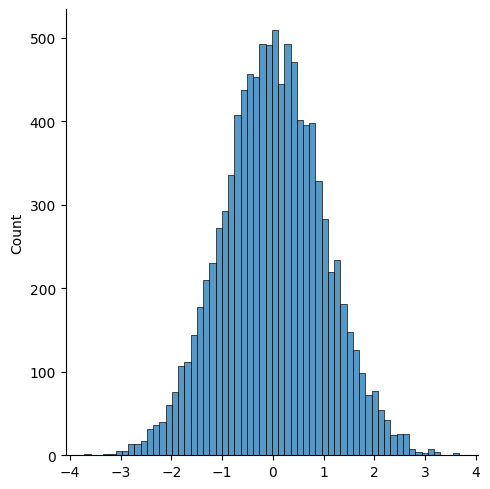

In [84]:
sns.displot(z_scores, kde=False)

In [85]:
# t - распределение

In [86]:
t_scores = []
n = 10000

In [87]:
for i in range(n):
    sample = np.random.choice(population, sample_size, False) #наша выборки
    sample_mean = sample.mean()
    sample_std = sample.std() #находим стандартное отклонение в выборке
    
    se_ = sample_std / sample_size ** 0.5 #считаем стандартную ошибку среднего 
    t_score = (sample_mean - mu) / se_  #находим новое значение в распределение
    
    t_scores.append(t_score)

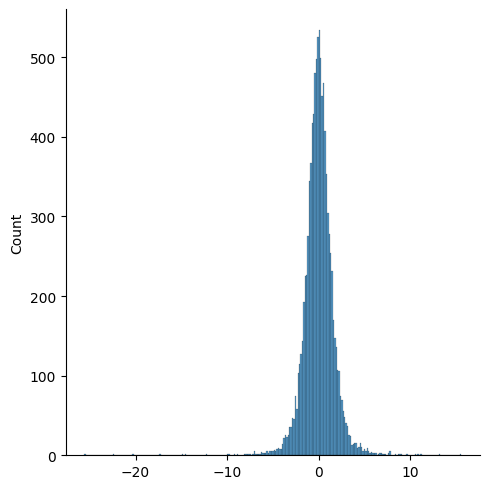

In [88]:
sns.displot(t_scores, kde=False)

In [90]:
# число степеней свободы для Т распределения
df = sample_size - 1
df

4

#### Распределение Стьюдента (Т-распределение)
Чем больше степеней свободы и чем больше наблюдений, тем всё больше распределение становится похожим на нормальное